In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1 Peningkatan Kualitas : Contrast Stretching

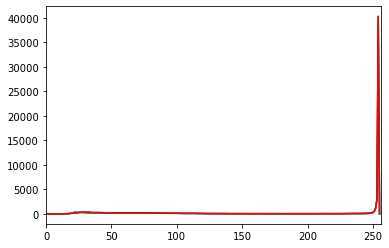

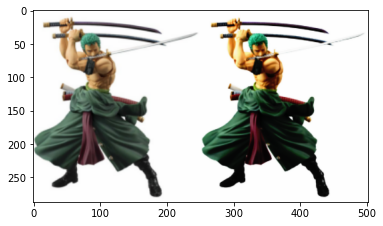

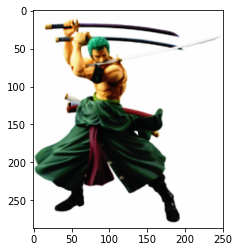

In [6]:
img = cv2.imread('data/zero.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

original = img.copy()

xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]

x = np.arange(256)

table = np.interp(x, xp, fp).astype('uint8')

img = cv2.LUT(img, table)

color = ('b', 'g', 'r')

for i, col in enumerate(color):
    histr = cv2.calcHist([original], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.show()

hasil = np.hstack((original, img))

plt.imshow(hasil)
plt.show()

plt.imshow(img)
plt.show()

2 Peningkatan Kualitas : Contrast Stretching 2 (Masking Normalisasi)

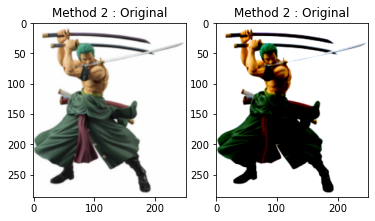

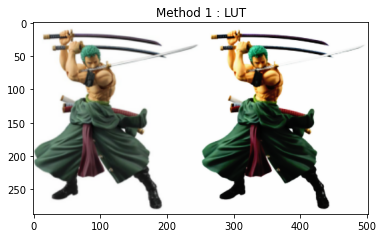

In [7]:
from PIL import Image

def masknormR(i):
    iI = i
    minI = 86
    maxI = 230
    minO = 0
    maxO = 255
    iO = (iI - minI)*(((maxO - minO) / (maxI - minI)) + minO)
    return iO

def masknormG(i):
    iI = i
    minI = 90
    maxI = 225
    minO = 0
    maxO = 255
    iO = (iI - minI)*(((maxO - minO) / (maxI - minI)) + minO)
    return iO

def masknormB(i):
    iI = i
    minI = 100
    maxI = 210
    minO = 0
    maxO = 255
    iO = (iI - minI)*(((maxO - minO) / (maxI - minI)) + minO)
    return iO

img = Image.open('data/zero.png')

layer = img.split()

normlayerR = layer[0].point(masknormR)
normlayerG = layer[1].point(masknormG)
normlayerB = layer[2].point(masknormB)

normImg = Image.merge("RGB", (normlayerR, normlayerG, normlayerB))

plt.subplot(1,2,1), plt.imshow(img), plt.title('Method 2 : Original')
plt.subplot(1,2,2), plt.imshow(normImg), plt.title('Method 2 : Original')
plt.show()
plt.imshow(hasil)
plt.title('Method 1 : LUT')
plt.show()

3 Peningkatan Kualitas : Sharpening Edge

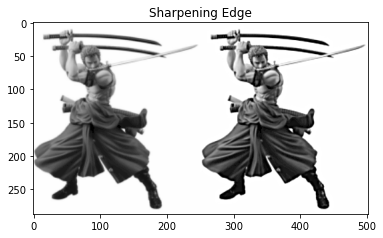

In [4]:
img = cv2.imread('data/zero.png', 0)

cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

mask = np.zeros((9,9), np.float32)
mask[4,4] = 2.0

boxFilter = np.ones((9,9), np.float32) / 81.0

mask = mask - boxFilter

output = cv2.filter2D(img, -1, mask)

hasil3 = np.hstack((img, output))

plt.imshow(hasil3, cmap=plt.get_cmap("gray"))
plt.title("Sharpening Edge")
plt.show()